# import modules

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data

In [110]:
data=pd.read_table('anomaly-s110.dat',header=None,sep='\t')

In [111]:
data=data.iloc[:,0:100]

# data exploration

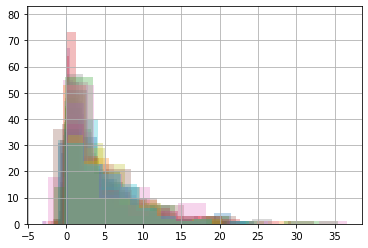

In [112]:
# row wise histograms
# all rows seems to have similar kind of dist[namely exp dist] as they are overlapping quite well.
for i in range(100):
    data.iloc[i,:].hist(alpha=0.3)

### rows

In [113]:
data.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.119550,0.139088,0.129276,0.231873,0.261591,0.371853,0.417478,0.358749,0.324482,0.622394,...,4.990199,4.784278,4.995780,5.463824,4.196371,5.374741,5.406740,4.862247,5.057613,5.238912
std,0.223885,0.162317,0.151818,0.305164,0.477650,0.482898,0.418022,0.439253,0.363323,0.665968,...,5.058194,4.226265,5.981870,5.526268,4.294064,5.731628,5.732516,5.382611,4.594448,4.378304
min,-0.219470,0.001564,-0.581616,-1.634611,-3.130765,-0.824452,-0.127272,-1.446037,-1.080419,-1.936564,...,-0.214528,0.032046,-0.113569,0.064075,0.051549,-1.764685,0.017660,0.096489,0.187496,0.009844
25%,0.024697,0.036049,0.042755,0.065851,0.070161,0.108009,0.115483,0.098915,0.111339,0.223160,...,1.402278,1.543454,1.177768,1.227426,1.270008,1.089090,1.281813,1.560865,1.678455,1.916181
50%,0.065827,0.095709,0.118010,0.160348,0.233856,0.261139,0.320119,0.242649,0.217602,0.466731,...,3.707643,3.472596,2.844093,3.451176,2.554553,3.146168,3.438088,2.601672,3.354388,4.064243
75%,0.124352,0.158094,0.185989,0.337741,0.491850,0.585328,0.598798,0.455434,0.503075,0.795810,...,6.811972,7.037060,6.815666,7.748716,5.954720,8.051754,7.750695,6.190052,7.224766,7.872026
max,1.572921,0.883655,0.690379,1.144386,1.330569,2.809149,2.011168,1.753187,2.353753,2.632632,...,21.477533,20.517488,35.483725,22.609813,23.352113,32.363973,36.556162,26.849083,20.381493,23.781836


(array([82.,  9.,  1.,  3.,  1.,  1.,  0.,  0.,  1.,  2.]),
 array([0.18302202, 1.00119019, 1.81935837, 2.63752654, 3.45569471,
        4.27386289, 5.09203106, 5.91019924, 6.72836741, 7.54653559,
        8.36470376]),
 <BarContainer object of 10 artists>)

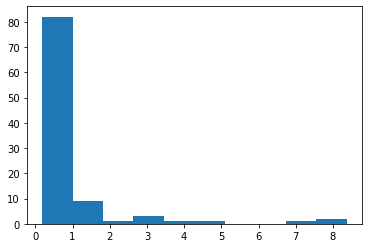

In [114]:
plt.hist((1/data.T.mean()))

(array([12., 10., 12., 14.,  8., 12.,  9., 10.,  6.,  7.]),
 array([0.11954996, 0.65397731, 1.18840467, 1.72283202, 2.25725938,
        2.79168673, 3.32611408, 3.86054144, 4.39496879, 4.92939615,
        5.4638235 ]),
 <BarContainer object of 10 artists>)

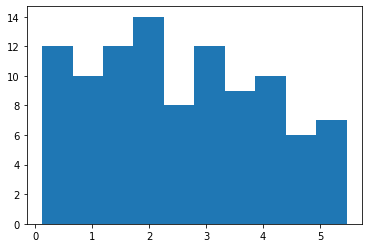

In [115]:
plt.hist(data.T.mean())
# since means is varying quite a lot they can not be from the same exp distribution

(array([14., 20., 13., 12., 13., 12.,  8.,  5.,  1.,  2.]),
 array([ 0.690379 ,  4.2769573,  7.8635356, 11.4501139, 15.0366922,
        18.6232705, 22.2098488, 25.7964271, 29.3830054, 32.9695837,
        36.556162 ]),
 <BarContainer object of 10 artists>)

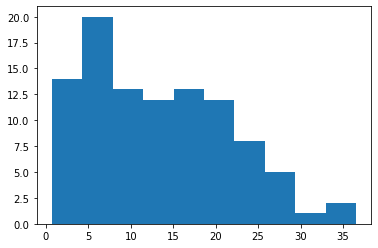

In [116]:
plt.hist(data.T.max())

In [117]:
# in how many rows there is negative points
len([l for l in list(data.T.min()) if l<0])

61

(array([ 2.,  0.,  2.,  1.,  9.,  4.,  8., 13., 15., 46.]),
 array([-3.130765 , -2.7989389, -2.4671128, -2.1352867, -1.8034606,
        -1.4716345, -1.1398084, -0.8079823, -0.4761562, -0.1443301,
         0.187496 ]),
 <BarContainer object of 10 artists>)

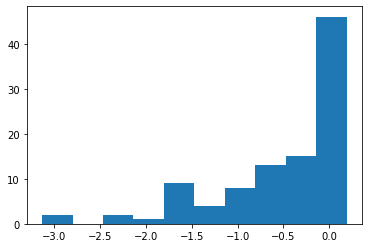

In [118]:
plt.hist(data.T.min())

##### rows analysis
- it seems that rows are generated from diff exp dists; but they can not be from location-exp dist as there are very few negative points in each 100 samples from a exp dist. That cannot happen as they are the most probable points. They seem anomalies. 

### column

In [119]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,13.354197,10.612138,9.431974,8.455350,7.814148,7.401769,6.948889,6.544222,6.251710,5.981074,...,0.276685,0.153571,0.154116,0.210960,0.197339,0.120264,0.087381,0.076194,0.044209,-0.013497
std,8.472024,6.570143,5.726459,5.162005,4.637531,4.505215,4.127328,3.891931,3.729813,3.597689,...,0.347648,0.430310,0.288364,0.267641,0.267635,0.197255,0.155564,0.083455,0.136580,0.277240
min,0.504331,0.376972,0.335134,0.231511,0.212933,0.210354,0.209624,0.196178,0.183648,0.207237,...,-1.009113,-2.992838,-1.764685,-0.571319,-0.437618,-0.824452,-0.623385,-0.002916,-0.938286,-2.354188
25%,6.462519,5.485747,4.796471,4.520371,4.415650,3.644819,3.647804,3.405716,3.299394,3.001344,...,0.112925,0.085229,0.075364,0.077143,0.065911,0.048899,0.035849,0.023128,0.011083,0.003005
50%,12.695776,10.399386,9.132731,7.644817,7.084449,6.647969,6.224044,6.063785,5.782635,5.367807,...,0.235905,0.177796,0.160765,0.148624,0.131543,0.094846,0.071469,0.054416,0.030620,0.011456
75%,20.051852,15.642375,12.864171,11.755916,10.799403,10.499430,10.048803,9.441142,8.887056,8.708741,...,0.386693,0.310848,0.266771,0.256877,0.237072,0.164255,0.141979,0.101493,0.064393,0.032472
max,36.556162,28.958184,23.405414,20.188057,18.165952,17.635497,16.907080,16.868437,15.393030,15.067470,...,2.146219,0.827836,1.046068,1.664594,1.477222,1.394541,0.875885,0.559475,0.670377,0.370311


(array([ 1., 92.,  4.,  2.,  0.,  1.]),
 array([-100,    0,    5,   10,   15,   20,   25]),
 <BarContainer object of 6 artists>)

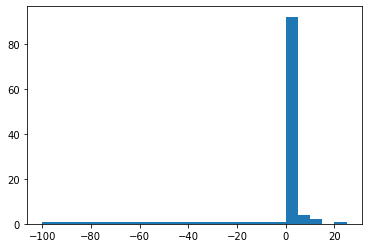

In [120]:
plt.hist(1/(data.mean()),bins=[-100,0,5,10,15,20,25])

(array([39., 25., 15.,  9.,  5.,  3.,  1.,  2.,  0.,  1.]),
 array([-0.01349706,  1.32327231,  2.66004168,  3.99681104,  5.33358041,
         6.67034978,  8.00711915,  9.34388852, 10.68065788, 12.01742725,
        13.35419662]),
 <BarContainer object of 10 artists>)

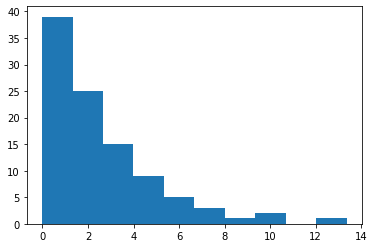

In [121]:
plt.hist(data.mean())

(array([ 2.,  0.,  2.,  3.,  9.,  2., 17., 15., 35., 15.]),
 array([-3.130765 , -2.7672554, -2.4037458, -2.0402362, -1.6767266,
        -1.313217 , -0.9497074, -0.5861978, -0.2226882,  0.1408214,
         0.504331 ]),
 <BarContainer object of 10 artists>)

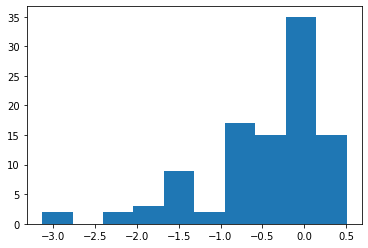

In [122]:
plt.hist(data.min())

(array([49., 21., 13.,  7.,  6.,  1.,  1.,  1.,  0.,  1.]),
 array([ 0.370311 ,  3.9888961,  7.6074812, 11.2260663, 14.8446514,
        18.4632365, 22.0818216, 25.7004067, 29.3189918, 32.9375769,
        36.556162 ]),
 <BarContainer object of 10 artists>)

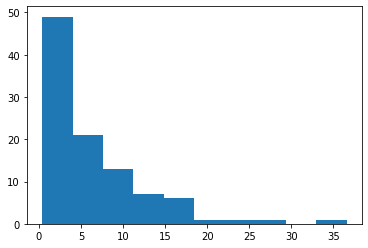

In [123]:
plt.hist(data.max())

- see that max of 100 samples in each col is quite different
- it could be that each col is generated from different exp model with diff rate parameter
- but it can not be as rate parameter can never be negative but it is for some exp dist when we assume that cols are differently generated
- so it is dismissed

### overall exploration

In [124]:
uni_points=[]
for i in range(100):
    uni_points.extend(list(data.iloc[i,:]))

In [125]:
neg_points=[p for p in uni_points if p<0]
print(len(neg_points))

96


In [126]:
# from statistics import mean ,stdev
mu=sum(uni_points)/len(uni_points)
sd=np.sqrt(sum(((np.array(uni_points)-mu)**2))/(len(uni_points)-1))

In [127]:
print(mu,' = mean--sd = ',sd)

2.5453421763999997  = mean--sd =  3.292685536348141


- seems to me that model can be taken univariate exponantial dist.
- based on the fact that values can not be negative we can get all negative values as outliers and then other far off values can be found based on p-value(95 or 99) concept

In [128]:

print('Total range points :: ',min(uni_points),'= min--max =',max(uni_points))

Total range points ::  -3.1307650000000002 = min--max = 36.556162


(array([0.000e+00, 1.000e+00, 3.000e+00, 1.800e+01, 7.400e+01, 4.085e+03,
        1.836e+03, 1.167e+03, 8.090e+02, 5.070e+02, 3.760e+02, 2.560e+02,
        2.050e+02, 1.540e+02, 1.120e+02, 1.040e+02, 5.900e+01, 4.800e+01,
        3.100e+01, 2.800e+01, 2.800e+01, 2.000e+01, 1.600e+01, 2.000e+01,
        5.000e+00, 1.200e+01, 4.000e+00, 3.000e+00, 6.000e+00]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 29 artists>)

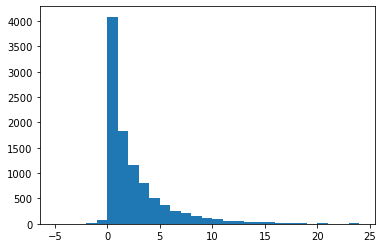

In [129]:
plt.hist(uni_points,density=False,bins=list(range(-5,25)))

# How to detect anomaly?

- Since it is univariate data, we can easily plot a hist of it and see if any popular distribution model fits or not.
- Did make a hist and can clearly see that it is either a mix of two distribution[one that has negative support and one is exponential] or it is just plain exp  dist with negative values as outliers.
    - first case is complex as we have to use EM algo or something and that also is generally applied when models are Guassians but that is not the case. Also I don't know any distribution [in well known ones] that has negative support only.
    - And then second case is quite simple and seems more reasonable to be assumed. We can easily implement it and see what happens.
- Another possibility is that each row is assumed to have exp dist[BUT WITH DIFFERENT RATE PARAMETER]. And it is the best I can think of for this data set.
- I have done this last one. Also I can safely detect that negative values are indeed anomalies. Reasoning is given in above section.

In [130]:
def get_anomalies(row_no=0,alpha=5): # 0-99
    global data

    thershold=(alpha/100)
    
    init_data=list(data.iloc[row_no,:])
    n_points=len(init_data)
    # make negatives outliers and then get para value from rest
    mask=n_points*[0]
    normal_data=[p for p in init_data if p>0]
    # get rate para estimate
    mu=sum(normal_data)/len(normal_data)
    para=1/mu
    # get area
    anomalies_count=0
    for i,x in enumerate(init_data):
        if x<0:
            mask[i]=1
            anomalies_count+=1
        else:
            area=np.exp(-para*x)
            if area<thershold:
                mask[i]=1
                anomalies_count+=1
    # return a list of all points with 0-1 mask 
    return {'mask':mask,'count':anomalies_count}

In [131]:
overall_mask=[]
alpha=5 # it 5% for 0.05
total_anomalies=0
count_progress=[0]
for i in range(100):
    detection_data=get_anomalies(row_no=i,alpha=alpha)
    overall_mask.append(detection_data['mask'])
    total_anomalies+=detection_data['count']
    count_progress.append(total_anomalies)
print('Total Anomalies in file = ',total_anomalies)
print('Total Anomalies Percantage = ',(100*total_anomalies/10000),'%')

Total Anomalies in file =  593
Total Anomalies Percantage =  5.93 %


For my answer this is how anomaly count progresses after each row:


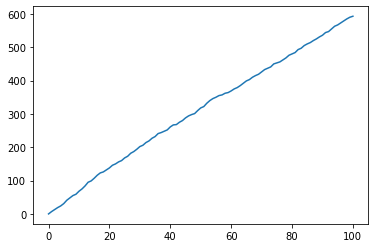

In [132]:
print('For my answer this is how anomaly count progresses after each row:')
plt.plot(count_progress)

total answer-sample anomalies >>  501
and this is how it does for sample-answer


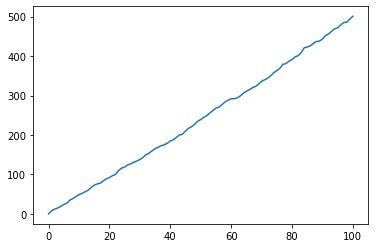

In [133]:
sample=pd.read_table('answer-sample.dat',header=None,sep=' ')
sample=sample.iloc[:,0:100]
count=0
count_progress=[0]
for i in range(100):
    point_list=list(sample.iloc[i,:])
    count+=len([p for p in point_list if p==1])
    count_progress.append(count)
print('total answer-sample anomalies >> ',count)
print('and this is how it does for sample-answer')
plt.plot(count_progress)

In [134]:
mask_df=pd.DataFrame(overall_mask)
mask_df.isnull().sum().sum()
mask_df.to_csv('answer-s110.dat',sep=' ',header=None)
# seperated by ' ' like answer-sample.dat